# Analysis of genre popularity based on the Kaggle platform's database 'Spotify HUGE database - daily charts over 3 years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore') 
%matplotlib inline
pd.set_option('display.max_columns', 151)

### Loading data

source: https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years?select=Final+database

In [2]:
#Importing the database with selected columns
df = pd.read_csv('../Orginal_database_from_Kaggle/Final database.csv', usecols=['Country', 'Popularity', 'Genre'])
df_1 = pd.read_csv('../Orginal_database_from_Kaggle/Final database.csv', usecols=['Country', 'Genre', 'Artist','Title','Album','Cluster','Popularity','Artist_followers'])

In [3]:
#Adding extra data set to use in plotly for interpetation country
df_country_iso = pd.read_csv(r'..\Country_ISO\countries_codes_and_coordinates.csv') 
df_country_iso = df_country_iso.replace('"','', regex=True) 

### Data exploration and identification of basic issues

In [4]:
kraj = list(df_country_iso['Country']) #wyciągnięcie krajów z iso
kraj
iso = list(df_country_iso['Alpha-3 code']) #wyciągnięcie skrótów krajów z iso
iso
dict = {}
iso = [x.strip(' ') for x in iso] # usnięcie spacji ze skrótów kodów
for i,j in zip(kraj,iso): # tworznie słownika na bazie którego zostanie zapełniona kolumna iso_alpha z df
    dict.setdefault(i,j)

In [5]:
df['iso_alpha'] = df['Country'] #dodanie kolmuny iso_alpha z wartościami Country aby dokonać podmiany na trzy literowen zonaczenie

df.replace({"iso_alpha": dict},inplace=True) # podmiana wartosci iso_alpha na ich odpowiednik 3 literowy potrzbne do wykrzystania w plotly do wyświetlania potrzbenych krajów

In [6]:
df.head()

Country  Popularity              Genre iso_alpha
0       Global    31833.95  argentine hip hop    Global
1          USA        8.00  argentine hip hop       USA
2    Argentina    76924.40  argentine hip hop       ARG
3      Belgium      849.60  argentine hip hop       BEL
4  Switzerland    20739.10  argentine hip hop       CHE

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     170633 non-null  object 
 1   Popularity  170633 non-null  float64
 2   Genre       170633 non-null  object 
 3   iso_alpha   170633 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.2+ MB


In [8]:
df.describe()

Popularity
count  170633.000000
mean     5417.616264
std     13115.854526
min         0.800000
25%        77.600000
50%       515.150000
75%      3867.850000
max    233766.900000

In [9]:
df.isna().sum()

Country       0
Popularity    0
Genre         0
iso_alpha     0
dtype: int64

In [10]:
# Finding out that the database contains 3952 "n-a" values
df['Genre'].value_counts()

dance pop         25351
latin              7591
pop                7146
k-pop              4053
n-a                3952
                  ...  
azonto                1
french reggae         1
bubblegum pop         1
pop venezolano        1
chinese manyao        1
Name: Genre, Length: 1120, dtype: int64

### Data cleansing

In [11]:
#Removing "n-a" values

df = df.replace('n-a', np.nan)
df = df.dropna()
df_1 = df_1.replace('n-a', np.nan)
df_1 = df_1.dropna()

In [12]:
#Checking if a column contains "n/a" values

df['Genre'].value_counts()

dance pop         25351
latin              7591
pop                7146
k-pop              4053
german hip hop     3834
                  ...  
azonto                1
french reggae         1
bubblegum pop         1
pop venezolano        1
chinese manyao        1
Name: Genre, Length: 1119, dtype: int64

### Data analysis

In [13]:
#counting unique values of few data
Counutries = df_1['Country'].nunique()
Genres = df_1['Genre'].nunique()
Titles = df_1['Title'].nunique()
Albums = df_1['Album'].nunique()
Artist = df_1['Artist'].nunique()

### Table of unique values 

In [14]:
df_unique = pd.DataFrame({'Countries': [Counutries],'Genres':[Genres], 'Artist': [Artist] , 'Albums':[Albums], 'Title': [Titles],})
df_unique.style.hide_index()

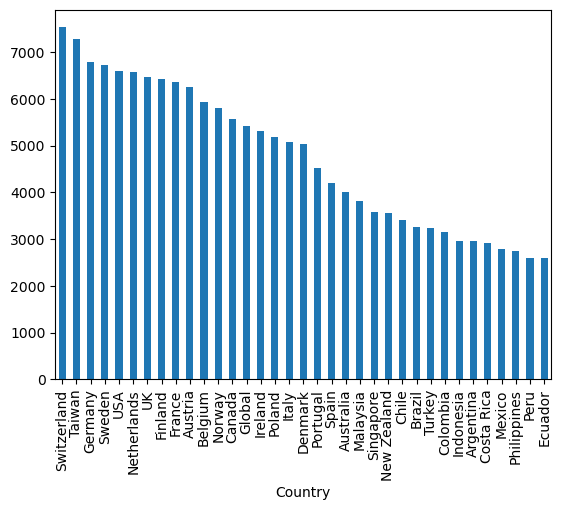

In [15]:
uniq_titles = df_1.groupby(['Country'])['Title'].count().sort_values(ascending=False) 
uniq_titles.plot(kind = 'bar')
pass

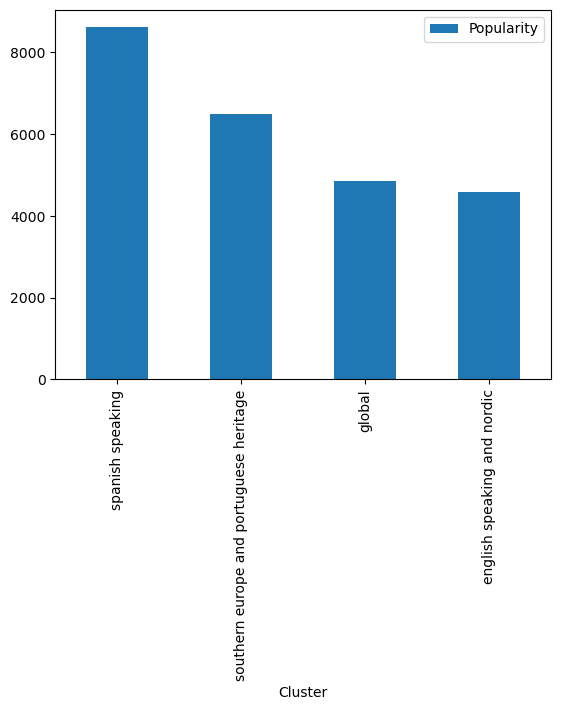

In [16]:
country_popularity = pd.DataFrame(df_1.groupby(['Cluster'])['Popularity'].mean().sort_values(ascending=False))
country_popularity.plot(kind='bar')
pass

In [19]:
print(tabulate(df_unique, headers=df_unique.columns,tablefmt='pipline',showindex=False))

  Countries    Genres    Artist    Albums    Title
-----------  --------  --------  --------  -------
         35      1119     23347     32634    44930


## Map of mean popularity

In [20]:
# mean to show on map
by_country = df.groupby('iso_alpha')['Popularity'].mean().reset_index().rename(columns={'iso_alpha': 'Country'})

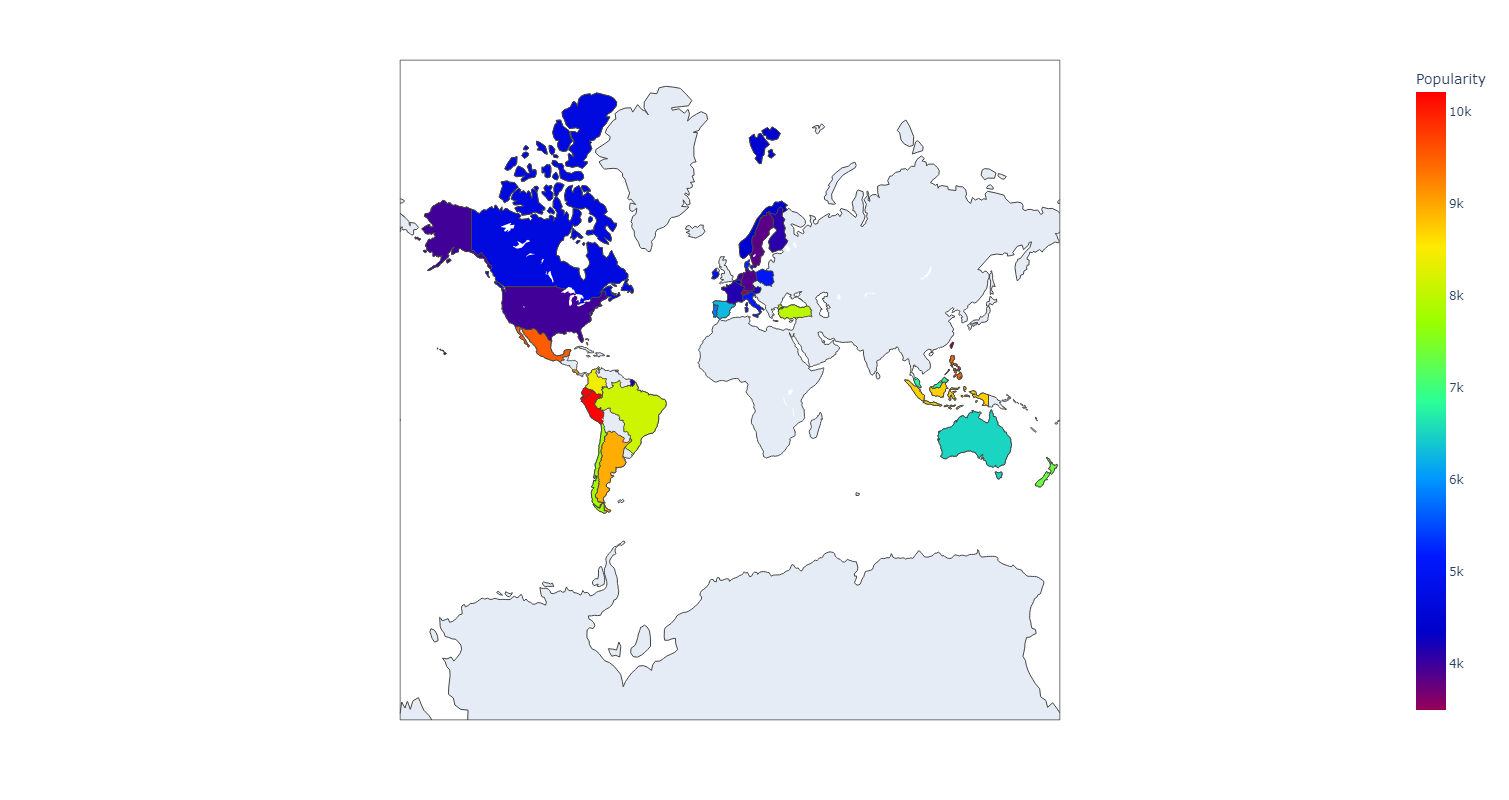

In [21]:
country_list = by_country
fig = px.choropleth(country_list, locations="Country",
                        color="Popularity", # lifeExp is a column of gapminder
                        hover_name="Country", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        width=800,
                        height=800,
                        projection = 'mercator')
fig.show()

In [22]:
#casting folat for easier comparison and extrac values
df_1['Artist_followers'] = df_1['Artist_followers'].astype('float')

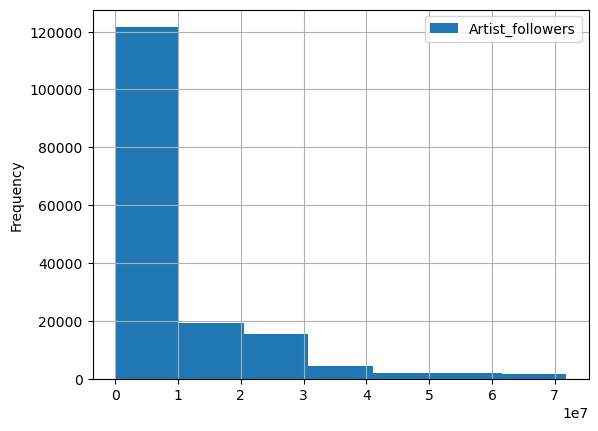

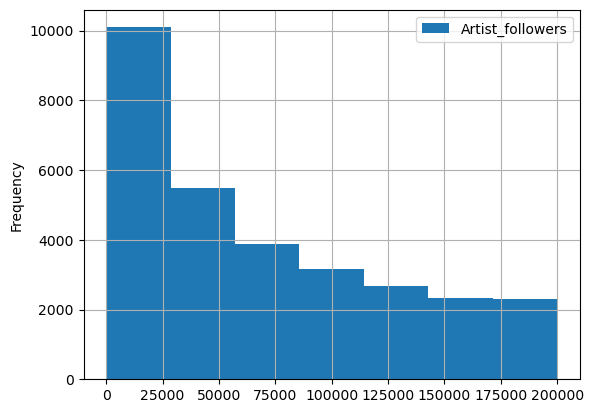

In [23]:
ca = df_1[['Country','Artist_followers']]
ca[['Artist_followers']].plot( kind='hist',grid=True,bins = 7)
pass
ca[ca.Artist_followers < 200000].plot( kind='hist',grid=True,bins = 7)
pass


In [24]:
df_3 = df_1[['Country','Cluster','Popularity']].sort_values(by= ['Cluster'])

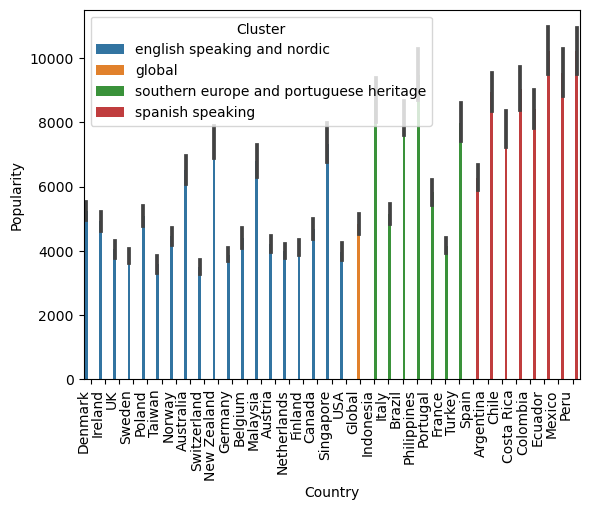

In [25]:
#g = sns.scatterplot(data=df_3, x="Country", y="Popularity", hue="Cluster",)
g = sns.barplot(data=df_3, x="Country", y="Popularity", hue="Cluster",)
g.set_xticklabels(g.get_xticklabels(), rotation=90,
                        horizontalalignment='right')
pass

In [26]:
#How many unique music genres are in the database?

unique_genre_count = df['Genre'].nunique()
unique_genre_count

1119

In [27]:
#How many occurrences of each music genre are there in total in a given country?

count_genre2 = df.groupby('Country')['Genre'].nunique()
count_genre2

Country
Argentina      143
Australia      215
Austria        292
Belgium        277
Brazil         139
Canada         232
Chile          165
Colombia       156
Costa Rica     166
Denmark        230
Ecuador        166
Finland        257
France         211
Germany        268
Global         256
Indonesia      171
Ireland        283
Italy          209
Malaysia       212
Mexico         176
Netherlands    263
New Zealand    207
Norway         299
Peru           148
Philippines    158
Poland         253
Portugal       257
Singapore      206
Spain          213
Sweden         317
Switzerland    289
Taiwan         300
Turkey         185
UK             297
USA            218
Name: Genre, dtype: int64

In [29]:
# Which countries have the greatest musical diversity? Top 5

unique_genre_counts = df.groupby('Country')['Genre'].nunique().nlargest(10)
unique_genre_counts

Country
Sweden         317
Taiwan         300
Norway         299
UK             297
Austria        292
Switzerland    289
Ireland        283
Belgium        277
Germany        268
Netherlands    263
Name: Genre, dtype: int64

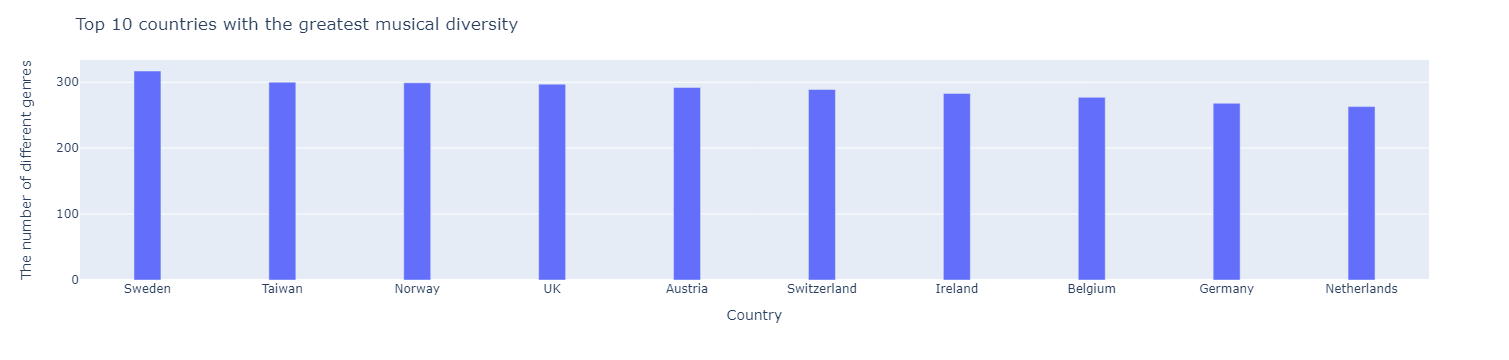

In [30]:
fig = px.bar(x=unique_genre_counts.index, y=unique_genre_counts.values, labels={'x':'Country', 'y':'The number of different genres'})
fig.update_layout(title='Top 10 countries with the greatest musical diversity')
fig.update_traces(width=0.2)
fig.show()

In [31]:
#Which genre is the most commonly listened to in a given country? Number of occurrences

result = df.groupby('Country')['Genre'].apply(lambda x: x.value_counts().nlargest(1))
result

Country                       
Argentina    latin                 619
Australia    dance pop             808
Austria      german hip hop       1119
Belgium      dance pop             859
Brazil       dance pop             591
Canada       dance pop             849
Chile        latin                1107
Colombia     latin                 845
Costa Rica   latin                 667
Denmark      danish hip hop       1059
Ecuador      latin                 793
Finland      finnish dance pop    2138
France       francoton            2332
Germany      german hip hop       1544
Global       dance pop             909
Indonesia    dance pop             530
Ireland      dance pop            1172
Italy        italian hip hop      1829
Malaysia     dance pop             821
Mexico       latin                 632
Netherlands  dutch hip hop        2690
New Zealand  dance pop             740
Norway       dance pop            1199
Peru         latin                 774
Philippines  dance pop           

In [32]:
#Which music genres are the most popular in Poland? Number of occurrences - top 10
poland_counts = df.query('Country == "Poland"')['Genre'].value_counts().nlargest(10)
poland_counts

polish hip hop        1342
dance pop              873
pop                    205
polish alternative     191
modern rock            106
big room               101
art pop                 98
emo rap                 91
alternative metal       89
polish pop              86
Name: Genre, dtype: int64

In [33]:
#Which music genres are the most popular in Taiwan? Number of occurrences - top 10
taiwan_counts = df.query('Country == "Taiwan"')['Genre'].value_counts().nlargest(10)
taiwan_counts

dance pop               1143
mandopop                 949
k-pop                    608
c-pop                    541
chinese indie            420
pop                      320
big room                 261
mainland chinese pop     205
taiwan pop                81
canadian pop              80
Name: Genre, dtype: int64

In [34]:
#Which music genres are the most popular in Ecuador? Number of occurrences - top 10
ecuador_counts = df.query('Country == "Ecuador"')['Genre'].value_counts().nlargest(10)
ecuador_counts

latin                793
dance pop            337
colombian pop        254
pop                   78
reggaeton             73
k-pop                 71
latin pop             63
argentine hip hop     56
boy band              43
big room              36
Name: Genre, dtype: int64

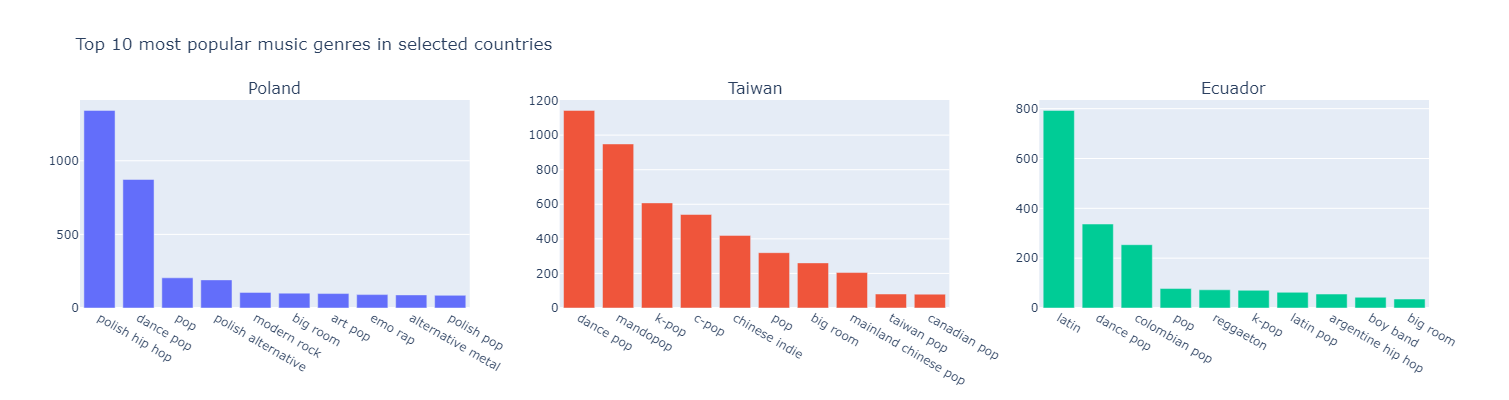

In [35]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Poland", "Taiwan", "Ecuador"))

fig.add_trace(go.Bar(x=poland_counts.index, y=poland_counts), row=1, col=1)
fig.add_trace(go.Bar(x=taiwan_counts.index, y=taiwan_counts), row=1, col=2)
fig.add_trace(go.Bar(x=ecuador_counts.index, y=ecuador_counts), row=1, col=3)

fig.update_layout(height=400, width=900,
                  title_text="Top 10 most popular music genres in selected countries", showlegend=False)

fig.show()

In [36]:
#Which music genres are the most popular in the database? Number of occurrences - top 10

genre_counts = df['Genre'].value_counts().nlargest(10)
genre_counts

dance pop         25351
latin              7591
pop                7146
k-pop              4053
german hip hop     3834
atl hip hop        3668
francoton          3279
dutch hip hop      3257
big room           3095
hip hop            3063
Name: Genre, dtype: int64

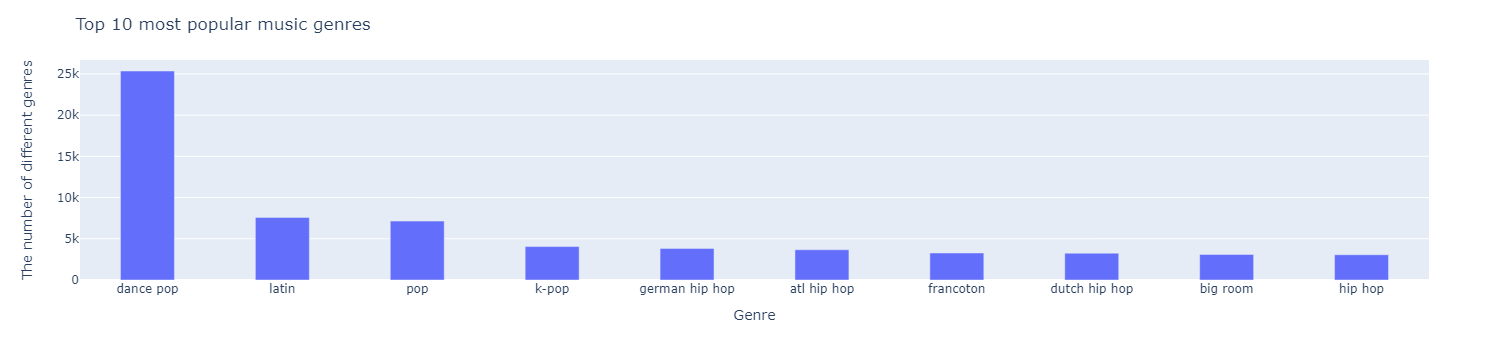

In [37]:
fig = px.bar(x=genre_counts.index, y=genre_counts, labels={'x':'Genre', 'y':'The number of different genres'})
fig.update_layout(title='Top 10 most popular music genres')
fig.update_traces(width=0.4)
fig.show()

In [62]:
top5_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iso_alpha  35 non-null     object
 1   Country    35 non-null     object
 2   Counts     35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


Please enter the name of the music genre for which you want to see the top 10 countries:  dance pop


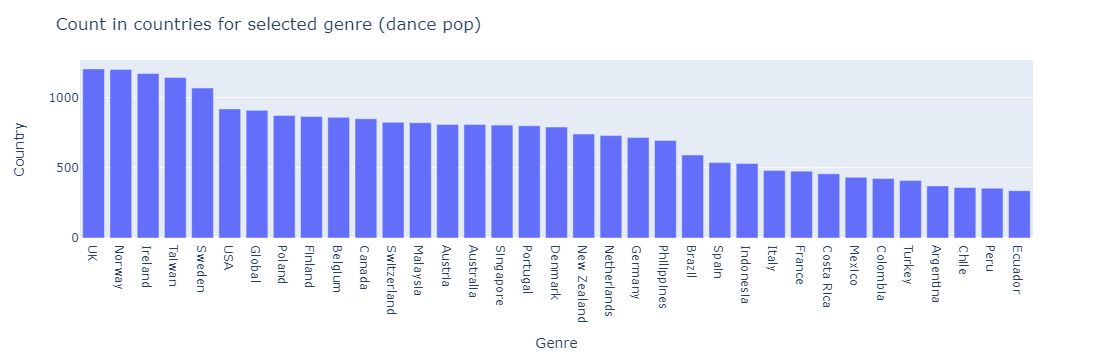

In [63]:
#Display the top 10 countries for selected genre
wprowadzony_gatunek = input("Please enter the name of the music genre for which you want to see the top 10 countries: ")
nowy_df = df.loc[df['Genre'] == wprowadzony_gatunek, ['Genre', 'Country','iso_alpha']]
zliczanie = nowy_df['Country'].value_counts()
zliczanie.columns = ['Country', 'Counts']
top_counts = nowy_df[['iso_alpha','Country']].value_counts().reset_index().rename(columns={0 : 'Counts'})
fig = px.bar(nowy_df, x=top_counts['Country'], y=top_counts['Counts'], labels={'x':'Genre', 'y':'Country'})
fig.update_layout(title=f"Count in countries for selected genre ({wprowadzony_gatunek})")
fig.show()

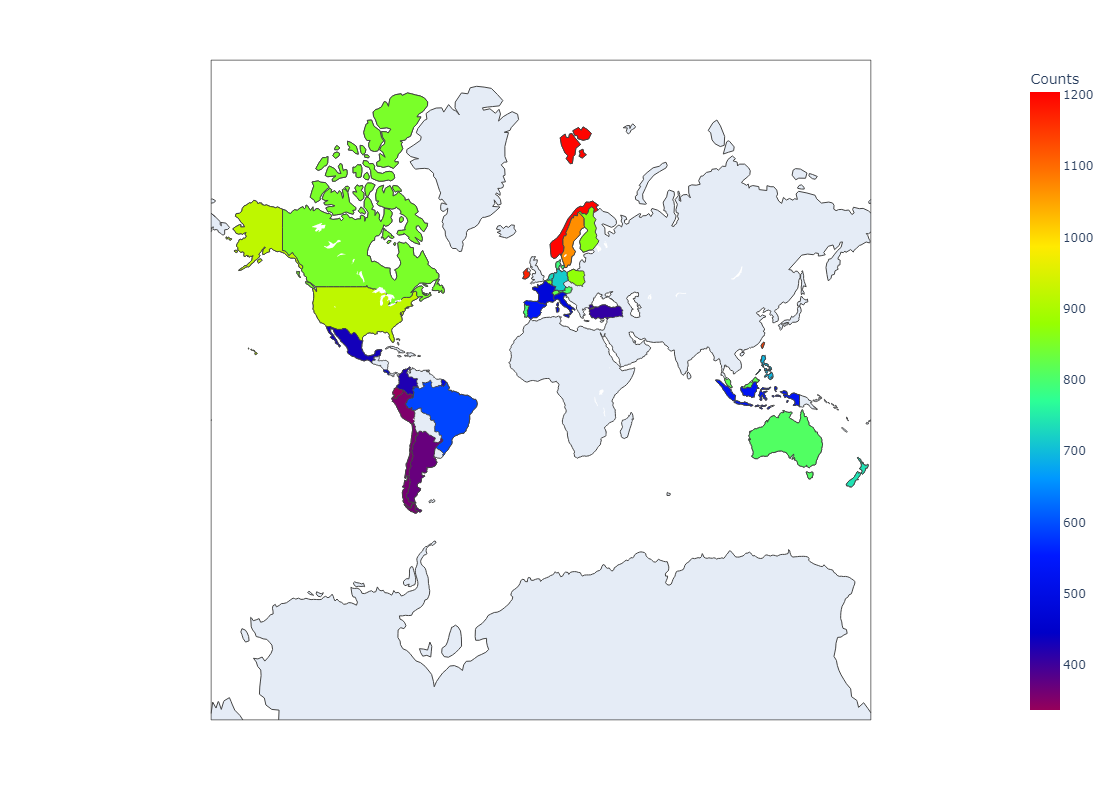

In [64]:
country_list = top_counts
fig = px.choropleth(country_list, locations="iso_alpha",
                        color="Counts", # lifeExp is a column of gapminder
                        hover_name="Country", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        width=800,
                        height=800,
                        projection = 'mercator')
fig.show()